# Explore here

It's recommended to use this notebook for exploration purposes.

For example: 

1. You could import the CSV generated by python into your notebook and explore it.
2. You could connect to your database using `pandas.read_sql` from this notebook and explore it.

El data set que vamos a ver es de un Banco en Portugal

El Banco portugués está teniendo una baja en sus ingresos. 
El Banco quiere predecir qué clientes tienen más probabilidades de suscribir un depósito a plazo y tratar de concentrar sus fuerzas en poder captar ese tipo de clientes.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df_raw = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv', delimiter=';')

In [3]:
df_raw.to_csv('../data/raw/dataset_bank.csv')

In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

En este listado vemos que hay 21 columnas, de las cuales 11 columnas son categoricas y 10 numericas.
Nuestra vriable objetivo es y , esta es categorica.
Vemos que no hay valores Nan.

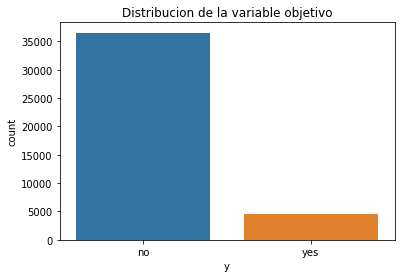

In [21]:
# Vamos a ver como se distribuye nuestra variable objetivo

sns.countplot(x=df_raw['y'], data=df_raw)
plt.title('Distribucion de la variable objetivo')
plt.show()

In [32]:
cta_no=36548/41188*100
cta_si=4640/41188*100
print("Porcentaje que NO : {:.2f} %".format(cta_no))
print("Porcentaje que SI : {:.2f} %".format(cta_si))

Porcentaje que NO : 88.73 %
Porcentaje que SI : 11.27 %


Podemos ver que estan desequilibrados, la mayoria esta en la clase cuya respuesta es no.

In [7]:
"""
Age (numerical)
Job: Type of Job (categorical)
Marital: marital status (categorical)
Education: (categorical)
Default: has credit in default? (categorical)
Housing: has housing loan? (categorical)
Loan: has personal loan? (categorical)
contact: contact communication type (categorcial)
month: last contact month of year (categorical)
day_of_week: last contact day of the week (categorical)
duration: last contact duration, in seconds (numerical)
Important note: this output highly affects the output target (if duration = 0, then y = 'no'). Yet, the duration is not known before a call is performed. Also, after the end of the call, y is obviously known. Consider if you should include it or not for a realistic predictive model.
campaign: number of contacts performed during this campaign and for this client (numerical)
pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
previous: number of contacts performed before this campaign and for this client (numerical)
poutcome: outcome of the previous marketing campaign (categorical)
Important note: this attribute has three categories: 'failure', 'success' and 'non-existent'. 86% of the data falls into 'non-existent' category.
emp.var.rate: employment variation rate - quarterly indicator (numeric)
cons.price.idx: consumer price index- monthly indicator (numeric)
cons.conf.idx: consumer confidence index - monthly indicator (numeric)
euribor3m: euribor 3 month rate: - daily indicator(numeric)
nr.employed: number of employees - quarterly indicator (numeric)
Target variable:
y: has the client subscribed a term deposit?
"""

"\nAge (numerical)\nJob: Type of Job (categorical)\nMarital: marital status (categorical)\nEducation: (categorical)\nDefault: has credit in default? (categorical)\nHousing: has housing loan? (categorical)\nLoan: has personal loan? (categorical)\ncontact: contact communication type (categorcial)\nmonth: last contact month of year (categorical)\nday_of_week: last contact day of the week (categorical)\nduration: last contact duration, in seconds (numerical)\nImportant note: this output highly affects the output target (if duration = 0, then y = 'no'). Yet, the duration is not known before a call is performed. Also, after the end of the call, y is obviously known. Consider if you should include it or not for a realistic predictive model.\ncampaign: number of contacts performed during this campaign and for this client (numerical)\npdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)\nprevio

Vamos a tomar un dataset con los valores que son nuestro objetivo, en este caso la y
Lo vamos a separar para la exploracion del dataset original

In [22]:
objetivo = df_raw.y
df_raw_2 = df_raw.drop('y', axis=1)

In [23]:
cat_cols = df_raw_2.select_dtypes('object').columns
num_cols = df_raw_2.select_dtypes(['int', 'float']).columns
print("las columnas categoricas son",cat_cols)
print("las columnas numericas son",num_cols)

las columnas categoricas son Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')
las columnas numericas son Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


In [27]:
# Hacemos una funcion para listar las columnas que contienen unknow

def verValueCounts(df,col):
    print("Value counts de {}".format(col))
    print(df[col].value_counts())
    print("="*60)

In [28]:
# Voy a recorrer la lista de las columnas categoricas que continen unknow y los vamos a listar
lista=['job','marital','education','default','housing','loan']
for i in lista:
    verValueCounts(df_raw_2,i)


Value counts de job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
Value counts de marital
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
Value counts de education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
Value counts de default
no         32588
unknown     8597
yes            3
Name: default, dtype: int64
Value counts de housing
yes        21576
no         18622
unknown      990
Name: housing, dtype: int64
Value counts de loan
no         33950
yes         6248
unknown

In [8]:
df_raw[df_raw['education']=='illiterate'][['education','y']]

,education,y
5393,illiterate,no
6928,illiterate,no
12383,illiterate,no
14445,illiterate,no
14486,illiterate,no
16269,illiterate,no
17739,illiterate,no
22402,illiterate,no
22642,illiterate,no
26680,illiterate,no


In [9]:
df_raw[df_raw['education']=='unknown'][['education','y']]

,education,y
7,unknown,no
10,unknown,no
26,unknown,no
30,unknown,no
31,unknown,no
...,...,...
41118,unknown,no
41120,unknown,no
41122,unknown,yes
41135,unknown,no


In [33]:
df_raw_2['contact'].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

In [34]:
df_raw_2['month'].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [35]:
df_raw_2['day_of_week'].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [36]:
df_raw_2['poutcome'].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In [38]:
# Funcion para convertir los valores unknow por el valor mas frecuente de esa variable

def repl_with_freq(df,col):
    freq = df[col].value_counts().idxmax()
    print("El valor maximo de frecuencia es:", freq)
    df[col].replace('unknown', freq , inplace = True)
    print("Se remplazo el valor unknown por el que tiene mas valores:", freq)

In [39]:
for i in lista:
    repl_with_freq(df_raw_2,i)
    print("="*65)

El valor maximo de frecuencia es: admin.
Se remplazo el valor unknown por el que tiene mas valores: admin.
El valor maximo de frecuencia es: married
Se remplazo el valor unknown por el que tiene mas valores: married
El valor maximo de frecuencia es: university.degree
Se remplazo el valor unknown por el que tiene mas valores: university.degree
El valor maximo de frecuencia es: no
Se remplazo el valor unknown por el que tiene mas valores: no
El valor maximo de frecuencia es: yes
Se remplazo el valor unknown por el que tiene mas valores: yes
El valor maximo de frecuencia es: no
Se remplazo el valor unknown por el que tiene mas valores: no


In [40]:
# Verificamos que se halla cambiado correctamente los valores
for i in lista:
    verValueCounts(df_raw_2,i)

Value counts de job
admin.           10752
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: job, dtype: int64
Value counts de marital
married     25008
single      11568
divorced     4612
Name: marital, dtype: int64
Value counts de education
university.degree      13899
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
illiterate                18
Name: education, dtype: int64
Value counts de default
no     41185
yes        3
Name: default, dtype: int64
Value counts de housing
yes    22566
no     18622
Name: housing, dtype: int64
Value counts de loan
no     34940
yes     6248
Name: loan, dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
data['education'] = encoder.fit_transform(data['education'])

In [ ]:
# Esto es para los datos que no tienen un orden
data = pd.get_dummies(data, columns = ['job', 'marital', 'default','housing', 'loan', 'contact', 'poutcome'])
data.head()

In [ ]:
#Let's store the 'y' into target variable

target_variable=data['y']
data=data.drop('y',axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target_variable, test_size=0.3, random_state=42)

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [ ]:
pipe_lr = make_pipeline(StandardScaler(), LogisticRegression())
pipe_lr.fit(X_train, y_train)  # apply scaling on training data
pipe_lr.score(X_test, y_test)  # apply scaling on testing data, without leaking training data.